In [14]:
import cv2
import numpy as np
from PIL import Image, ImageEnhance
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'brightness:0.5')

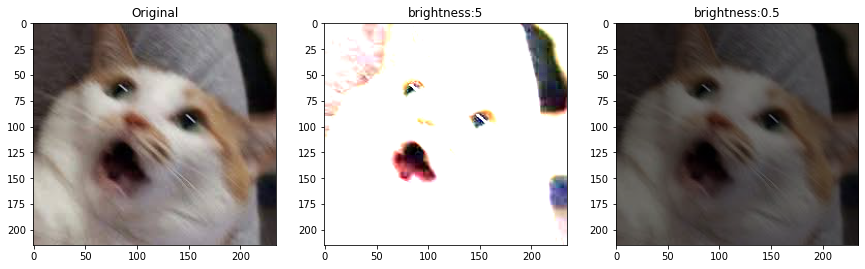

In [15]:
#讀取影像
img = Image.open("img_cat.jpg")

# 調整亮度
brightness = ImageEnhance.Brightness(img)

output_a = brightness.enhance(5)         # 提高亮度
output_b = brightness.enhance(0.5)      # 降低亮度

plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(2,4,2)
plt.imshow(output_a)
plt.title('brightness:5')
plt.subplot(2,4,3)
plt.imshow(output_b)
plt.title('brightness:0.5')

Text(0.5, 1.0, 'contrast:0.5')

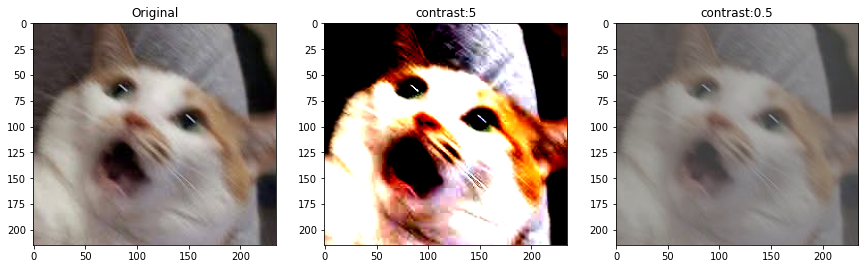

In [16]:
#讀取影像
img = Image.open("img_cat.jpg")

# 調整對比
contrast = ImageEnhance.Contrast(img)

output_a = contrast.enhance(5)           # 提高對比
output_b = contrast.enhance(0.5)        # 降低對比

plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(2,4,2)
plt.imshow(output_a)
plt.title('contrast:5')
plt.subplot(2,4,3)
plt.imshow(output_b)
plt.title('contrast:0.5')

Text(0.5, 1.0, 'color:0.1')

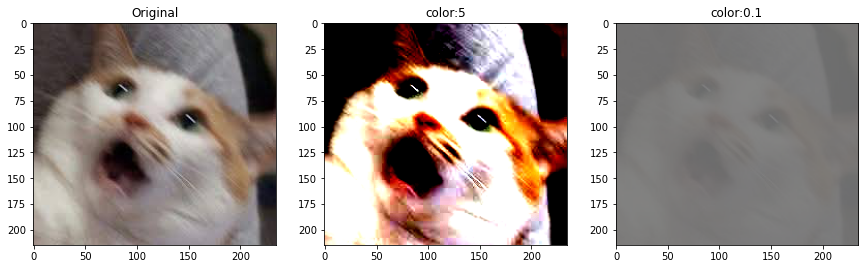

In [17]:
#讀取影像
img = Image.open("img_cat.jpg")

# 調整飽和度
color = ImageEnhance.Contrast(img)

output_a = color.enhance(5)          # 提高飽和度
output_b = color.enhance(0.1)       # 降低飽和度

plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(2,4,2)
plt.imshow(output_a)
plt.title('color:5')
plt.subplot(2,4,3)
plt.imshow(output_b)
plt.title('color:0.1')

Text(0.5, 1.0, 'sharpness:0')

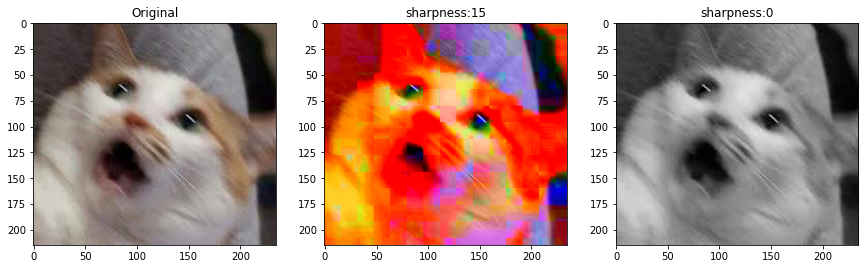

In [18]:
#讀取影像
img = Image.open("img_cat.jpg")

# 調整銳利度
sharpness = ImageEnhance.Color(img)

output_a = sharpness.enhance(15)        # 提高銳利度
output_b = sharpness.enhance(0)         # 降低銳利度

plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(2,4,2)
plt.imshow(output_a)
plt.title('sharpness:15')
plt.subplot(2,4,3)
plt.imshow(output_b)
plt.title('sharpness:0')

Text(0.5, 1.0, 'After')

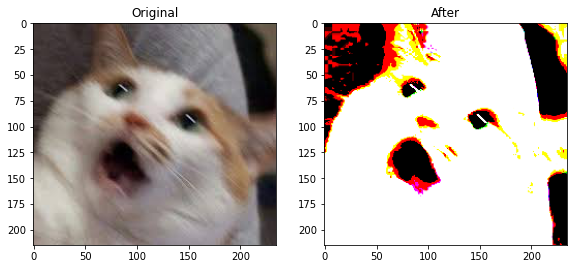

In [19]:
#讀取影像
img = Image.open("img_cat.jpg")

brightness = ImageEnhance.Brightness(img)
img1 = brightness.enhance(3)         
contrast = ImageEnhance.Contrast(img1)
img2 = contrast.enhance(3)  
contrast = ImageEnhance.Contrast(img2)
img3 = contrast.enhance(3)  
sharpness = ImageEnhance.Color(img3)
img4 = sharpness.enhance(8) 

plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(2,4,2)
plt.imshow(img4)

plt.title('After')

# 修復老照片

Text(0.5, 1.0, 'After')

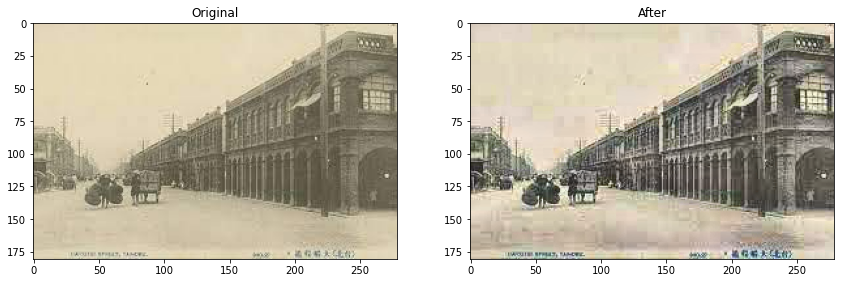

In [30]:
#載入影像
img = cv2.imread("old_img.jpg",cv2.IMREAD_COLOR)
img = img[:,:,::-1]
#BGR轉Lab
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
#拆通道
l_channel, a_channel, b_channel = cv2.split(img1)
#對每一通道質方圖均衡化
clahe = cv2.createCLAHE(clipLimit = 2.0 , tileGridSize=(8,8))
l_channel = clahe.apply(l_channel)
a_channel = clahe.apply(a_channel)
b_channel = clahe.apply(b_channel)
#重新組和
img1 = cv2.merge((l_channel, a_channel, b_channel))

result = cv2.cvtColor(img1, cv2.COLOR_Lab2BGR)

plt.figure(figsize=(30,20))
plt.subplot(2,4,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(2,4,2)
plt.imshow(result)
plt.title('After')

In [1]:
import cv2
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    # 套用自適應二值化黑白影像
    img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY);
    img_gray = cv2.medianBlur(img_gray, 5)
    output = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    cv2.imshow('oxxostudio', output)
    if cv2.waitKey(1) == ord('q'):
        break       # 按下 q 鍵停止
cap.release()
cv2.destroyAllWindows()

In [2]:
import cv2

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    ret, frame = cap.read()

    if not ret:
        print("Cannot receive frame")
        break

    # Convert the frame to grayscale
    img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur filter
    img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)

    cv2.imshow('oxxostudio', img_blur)

    if cv2.waitKey(1) == ord('q'):
        break  # Press 'q' to stop

cap.release()
cv2.destroyAllWindows()


In [4]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    ret, frame = cap.read()

    if not ret:
        print("Cannot receive frame")
        break

    # Split the frame into color channels
    b, g, r = cv2.split(frame)

    # Example: Enhance the blue channel, suppress green and red channels
    enhanced_blue = cv2.equalizeHist(b)
    suppressed_green = (g * 0.5).astype(np.uint8)  # Ensure dtype is uint8
    suppressed_red = (r * 0.5).astype(np.uint8)    # Ensure dtype is uint8

    # Merge the color channels back together
    filtered_frame = cv2.merge([enhanced_blue, suppressed_green, suppressed_red])

    cv2.imshow('oxxostudio', filtered_frame)

    if cv2.waitKey(1) == ord('q'):
        break  # Press 'q' to stop

cap.release()
cv2.destroyAllWindows()


In [5]:
import cv2
import numpy as np

# Callback function for trackbar changes
def update_parameters(x):
    pass

# Create a window
cv2.namedWindow('oxxostudio')

# Create trackbars for adjustable parameters
cv2.createTrackbar('Enhance Blue', 'oxxostudio', 0, 255, update_parameters)
cv2.createTrackbar('Suppress Green', 'oxxostudio', 0, 255, update_parameters)
cv2.createTrackbar('Suppress Red', 'oxxostudio', 0, 255, update_parameters)

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    ret, frame = cap.read()

    if not ret:
        print("Cannot receive frame")
        break

    # Split the frame into color channels
    b, g, r = cv2.split(frame)

    # Get trackbar values
    enhance_blue = cv2.getTrackbarPos('Enhance Blue', 'oxxostudio')
    suppress_green = cv2.getTrackbarPos('Suppress Green', 'oxxostudio')
    suppress_red = cv2.getTrackbarPos('Suppress Red', 'oxxostudio')

    # Apply adjustable color filter
    enhanced_blue = cv2.addWeighted(b, 1.0 + enhance_blue / 255.0, np.zeros_like(b), 0, 0)
    suppressed_green = (g * (1.0 - suppress_green / 255.0)).astype(np.uint8)
    suppressed_red = (r * (1.0 - suppress_red / 255.0)).astype(np.uint8)

    # Merge the color channels back together
    filtered_frame = cv2.merge([enhanced_blue, suppressed_green, suppressed_red])

    cv2.imshow('oxxostudio', filtered_frame)

    if cv2.waitKey(1) == ord('q'):
        break  # Press 'q' to stop

cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

# Callback function for trackbar changes
def update_parameters(x):
    pass

# Create a window
cv2.namedWindow('oxxostudio')

# Create trackbars for adjustable parameters
cv2.createTrackbar('Enhance Blue', 'oxxostudio', 0, 255, update_parameters)
cv2.createTrackbar('Suppress Green', 'oxxostudio', 0, 255, update_parameters)
cv2.createTrackbar('Suppress Red', 'oxxostudio', 0, 255, update_parameters)
cv2.createTrackbar('Sharpen', 'oxxostudio', 0, 255, update_parameters)
cv2.createTrackbar('Saturation', 'oxxostudio', 100, 200, update_parameters)

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    ret, frame = cap.read()

    if not ret:
        print("Cannot receive frame")
        break

    # Split the frame into color channels
    b, g, r = cv2.split(frame)

    # Get trackbar values
    enhance_blue = cv2.getTrackbarPos('Enhance Blue', 'oxxostudio')
    suppress_green = cv2.getTrackbarPos('Suppress Green', 'oxxostudio')
    suppress_red = cv2.getTrackbarPos('Suppress Red', 'oxxostudio')
    sharpen = cv2.getTrackbarPos('Sharpen', 'oxxostudio')
    saturation = cv2.getTrackbarPos('Saturation', 'oxxostudio')
